# Dataset

In [1]:
import pandas as pd
data1=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv') #It reads the data.
                            #The dataset is taken from kaggle
         #https://www.kaggle.com/spscientist/students-performance-in-exams
data1.head() #displays the columns and top 5 rows of the dataset.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
data=data1.copy() #It copy the dataset into data
data.head()  #It displays the columns and top 5 rows of the dataset.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.isna().sum() #shows if there is any missing

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
#Converting string to numeric data
#gender
data=data.replace({'male':1,'female':0})
#race/ethinic group
data= data.replace({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
#lunch
data= data.replace({'free/reduced':0, 'standard':1})
#test preparation course
data= data.replace({'none':0, 'completed':1})
#parents education
data= data.replace({'some college':3, "associate's degree":2, 'high school':4, 
                 'some high school':5, "bachelor's degree":1, "master's degree":0})

In [5]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,0,72,72,74
1,0,2,3,1,1,69,90,88
2,0,1,0,1,0,90,95,93
3,1,0,2,0,0,47,57,44
4,1,2,3,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,0,1,1,88,99,95
996,1,2,4,0,0,62,55,55
997,0,2,4,0,1,59,71,65
998,0,3,3,1,1,68,78,77


In [6]:
# This column is not required for Student Performance
data=data.drop(['lunch'], axis=1)

In [7]:
data.describe()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.919000,0.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.460333,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,2.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,3.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,100.00000,100.000000,100.000000


# Visualizing the data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

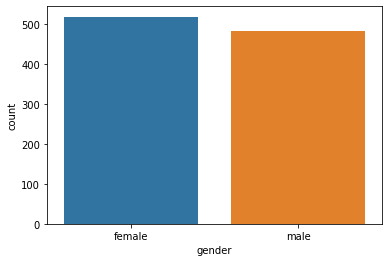

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.countplot(data1['gender']) # displays number of male and female in dataset

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

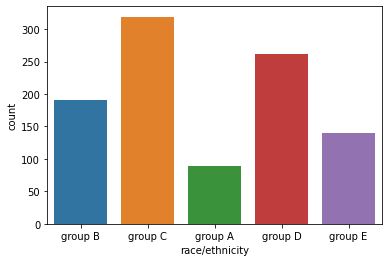

In [9]:
# displays the count of different race/ethnicity in dataset
sns.countplot(data1['race/ethnicity']) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

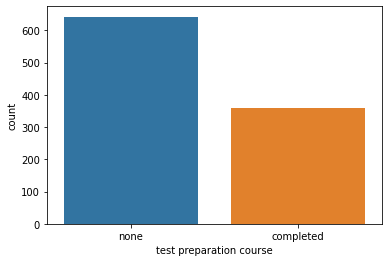

In [10]:
# displays count of student that completed/none the test prepration course
sns.countplot(data1['test preparation course']) 

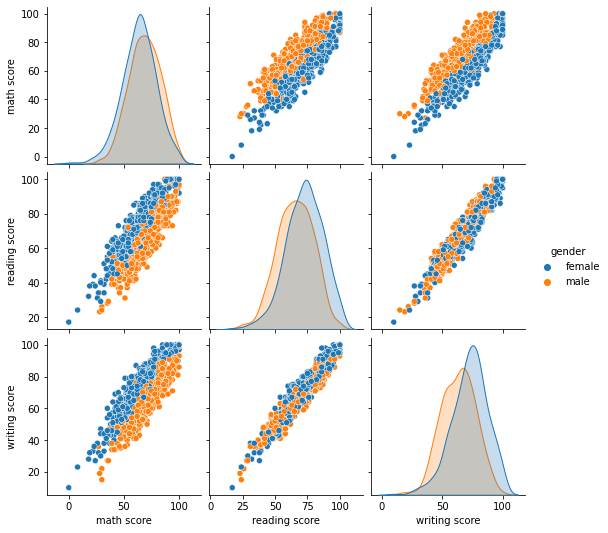

In [11]:
#This will show relation between two columns with respect to gender
sns.pairplot(data1,hue='gender')

# Pre-Processing the Data

In [12]:
# Total number of male and female in a dataset
data['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [13]:
data['average_score']=(data['math score']
                +data['reading score']+data['writing score'])//3
data.average_score.value_counts()
data.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average_score
0,0,1,1,0,72,72,74,72
1,0,2,3,1,69,90,88,82
2,0,1,0,0,90,95,93,92
3,1,0,2,0,47,57,44,49
4,1,2,3,0,76,78,75,76


# Assigning X and Y variable

In [14]:
# X and y -dependent variable and independent variable
y=data['average_score'] #independent variables
#dependent variables
X=data[data.columns.difference(['average_score'])]
X.head()

,gender,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,0,72,1,1,72,0,74
1,0,69,3,2,90,1,88
2,0,90,0,1,95,0,93
3,1,47,2,0,57,0,44
4,1,76,3,2,78,0,75


# labelling y variable

In [15]:
labels=['Fail','Pass']
bins=[0,75,100]
y=pd.cut(y,bins,labels=labels)
y.head()

0    Fail
1    Pass
2    Pass
3    Fail
4    Pass
Name: average_score, dtype: category
Categories (2, object): ['Fail' < 'Pass']

# Scaling the X variable

In [16]:
#Feature Scaling
#Normalization and Standardization of Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=X.columns
minmax_scale=scaler.fit(X[cols])
X[cols]=pd.DataFrame(minmax_scale.transform(X[cols]),columns=cols)
X.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,gender,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,0.0,0.72,0.2,0.25,0.662651,0.0,0.711111
1,0.0,0.69,0.6,0.50,0.879518,1.0,0.866667
2,0.0,0.90,0.0,0.25,0.939759,0.0,0.922222
3,1.0,0.47,0.4,0.00,0.481928,0.0,0.377778
4,1.0,0.76,0.6,0.50,0.734940,0.0,0.722222


# Train-Test Splitting

In [17]:
#Splitting the dataset into test-train model.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                        y,test_size=0.3,random_state=42)
print("Length of training Dataset: ",len(y_train))
print("Length of testing Dataset: ",len(y_test))

Length of training Dataset:  700
Length of testing Dataset:  300


In [18]:
y_train.head(),y_test.head()

(541    Pass
 440    Fail
 482    Fail
 422    Fail
 778    Pass
 Name: average_score, dtype: category
 Categories (2, object): ['Fail' < 'Pass'],
 521    Pass
 737    Fail
 740    Fail
 660    Fail
 411    Pass
 Name: average_score, dtype: category
 Categories (2, object): ['Fail' < 'Pass'])

# Decision Tree Classifier

In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier (max_leaf_nodes=None,random_state=42)
model.fit (X_train,y_train) # Training the model
score=model.score (X_test,y_test) # Test accuracy and performance
print('Accuracy score of Decision Tree Classifier: %f'% (score*100))
predict=model.predict(X_test)
scores=cross_val_score(model,X,y,cv=10)
print("\nDecision Tree Classifier: "+"cross_val_score: "+
      str(np.mean(scores)*100))

accuracy=accuracy_score(y_test,predict)


precision=precision_score(y_test,predict,average='micro')


recall=recall_score(y_test,predict,average='micro')


precision=precision_score(y_test,predict,average='micro')


f1=f1_score(y_test,predict,average='micro')


cm=confusion_matrix(y_test,predict)
print('\nConfusion matrix\n',(cm))

print('\nClassification Report:')
print(classification_report(y_test,predict))

Accuracy score of Decision Tree Classifier: 96.333333

Decision Tree Classifier: cross_val_score: 97.30000000000001

Confusion matrix
 [[212   2]
 [  9  77]]

Classification Report:
              precision    recall  f1-score   support

        Fail       0.96      0.99      0.97       214
        Pass       0.97      0.90      0.93        86

    accuracy                           0.96       300
   macro avg       0.97      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



# Classification report

In [20]:
#To predict if the student fail or pass 
import numpy as np
pred=np.array(X_test.loc[522,:]).reshape(1,-1)
prediction=model.predict(pred)[0]
print("You %s "% prediction)

You Fail 


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
# Printing the dataset shape
print ("Dataset Length: ", len(data))
print("Dataset Shape",data.shape)

Dataset Length:  1000
Dataset Shape (1000, 8)


# Logistic Regression


In [22]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
model=LogisticRegression(solver='liblinear', C=1.0,random_state=0)
model.fit(X_train,y_train)
#prediction on test dataset
#y_pred=model.
y_pred=model.predict(X_test)
predictor=model.score(X_test,y_test)
#print(y_pred)
print("Accuracy of the Logistic Regression model:  %f"%(predictor*100))

c1 =confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",c1)

print("\nclassification_report:\n")
print(classification_report(y_test, y_pred))

Accuracy of the Logistic Regression model:  92.666667

Confusion Matrix: 
 [[211   3]
 [ 19  67]]

classification_report:

              precision    recall  f1-score   support

        Fail       0.92      0.99      0.95       214
        Pass       0.96      0.78      0.86        86

    accuracy                           0.93       300
   macro avg       0.94      0.88      0.90       300
weighted avg       0.93      0.93      0.92       300



# Linear Regression 

In [23]:
# X and y -dependent variable and independent variable
y=data['average_score'] #independent variables
#dependent variables
X=data[data.columns.difference(['average_score'])]
#X.head()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
reg=LinearRegression().fit(X_train,y_train)

In [25]:
reg.score(X_train,y_train)

0.9996445661246488

In [26]:
reg.score(X_test,y_test)

0.9996295413009076

In [27]:
 #Testing Underfitting and Overfitting
from sklearn import linear_model
lasso_reg= linear_model.Lasso(alpha=50, 
                    max_iter=100, tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [28]:
lasso_reg.score(X_test,y_test)

0.9430849893691993

In [29]:
lasso_reg.score(X_train,y_train)

0.9450048553642729

In [30]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [31]:
ridge_reg.score(X_test,y_test)

0.9996291159383238

In [32]:
ridge_reg.score(X_train,y_train)

0.9996445407496125

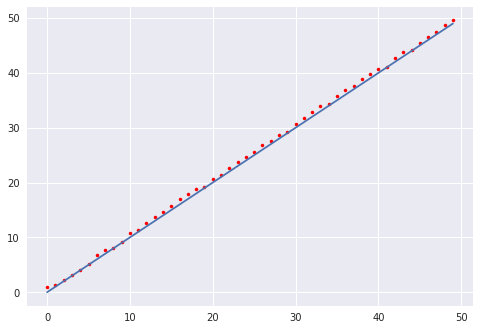

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import random
def f(m, X, c):
#"""Linear regression"""
    return [m * x + c for x in X]
X = [i for i in range(50)]
y = [x + random.random() for x in X]
m, c = 1, 0
y_hat = f(m, X, c)
plt.plot(X, y, '.', c='r')
plt.plot(X, y_hat)
plt.show()

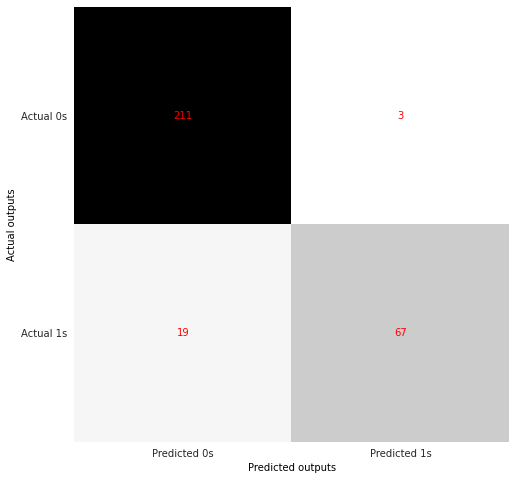

In [34]:
fig, ax = plt.subplots(figsize=(8, 8)) 
ax.imshow(c1)
ax.grid(False) 
ax.set_xlabel('Predicted outputs', fontsize=10, color='black') 
ax.set_ylabel('Actual outputs', fontsize=10, color='black')
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2): 
        ax.text(j, i, c1[i, j], ha='center', va='center', color='red') 
plt.show()

# Correlation's

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

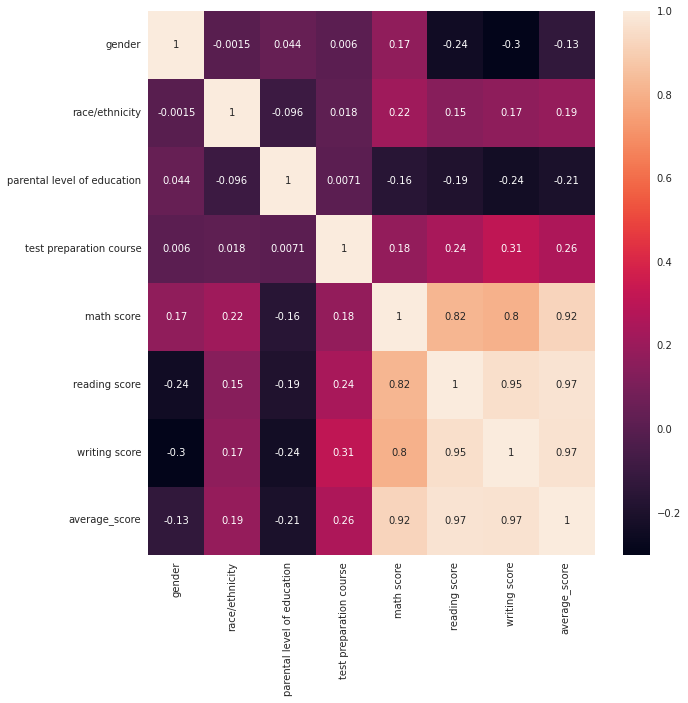

In [36]:
corr_matrix=data.corr()
top_corr=corr_matrix.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr].corr(),annot=True)

# Random Forest Classification

In [37]:
#Importing Data 
import pandas as pd
data=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data=data.replace({'male':1,'female':0})
#race/ethinic group
data= data.replace({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
#lunch
data= data.replace({'free/reduced':0, 'standard':1})
#test preparation course
data= data.replace({'none':0, 'completed':1})
#parents education
data= data.replace({'some college':3, "associate's degree":2, 'high school':4, 
                 'some high school':5, "bachelor's degree":1, "master's degree":0})
data=data.drop(['lunch'], axis=1)
data['average_score']=(data['math score']
                +data['reading score']+data['writing score'])//3


In [38]:
y=data['average_score'] #independent variables
#dependent variables
X=data[data.columns.difference(['average_score'])]
labels=['Fail','Pass']
bins=[0,75,100] #range 0>75 , 75>100
y=pd.cut(y,bins,labels=labels)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=X.columns
minmax_scale=scaler.fit(X[cols])
X[cols]=pd.DataFrame(minmax_scale.transform(X[cols]),
                columns=cols)
X.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,gender,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,0.0,0.72,0.2,0.25,0.662651,0.0,0.711111
1,0.0,0.69,0.6,0.50,0.879518,1.0,0.866667
2,0.0,0.90,0.0,0.25,0.939759,0.0,0.922222
3,1.0,0.47,0.4,0.00,0.481928,0.0,0.377778
4,1.0,0.76,0.6,0.50,0.734940,0.0,0.722222


In [40]:
y=y.replace({'Fail':0, 'Pass':1})

In [41]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                y, test_size=0.30, random_state=66)
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[212   0]
 [  1  87]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      0.99      0.99        88

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



=== All AUC Scores ===
[1.         1.         1.         0.99951433 0.99714286 0.99738095
 0.99952381 1.         0.99952381 1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.99930857559148


# Visualizing Random forest

In [43]:
import pandas as pd
data=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data=data.replace({'male':1,'female':0})
#race/ethinic group
data= data.replace({'group A':0,
        'group B':1, 'group C':2, 'group D':3, 'group E':4})
#lunch
data= data.replace({'free/reduced':0, 'standard':1})
#test preparation course
data= data.replace({'none':0, 'completed':1})
#parents education
data= data.replace({'some college':3, "associate's degree":2, 'high school':4, 
             'some high school':5, "bachelor's degree":1, "master's degree":0})

In [44]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['lunch'])
# Remove the labels from the features
# axis 1 refers to the columns
data= data.drop('lunch', axis = 1)
# Saving feature names for later use
feature_list = list(data.columns)
# Convert to numpy array
data = np.array(data)

In [45]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features,train_labels, test_labels=train_test_split(X, 
                                y, test_size = 0.30, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (700, 7)
Training Labels Shape: (700,)
Testing Features Shape: (300, 7)
Testing Labels Shape: (300,)


In [46]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature,
    round(importance, 2)) for feature,
                importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,
                        key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair))
                         for pair in feature_importances];

Variable: math score           Importance: 0.75
Variable: race/ethnicity       Importance: 0.16
Variable: writing score        Importance: 0.08
Variable: gender               Importance: 0.0
Variable: parental level of education Importance: 0.0
Variable: test preparation course Importance: 0.0
Variable: reading score        Importance: 0.0


# Unsupervisd Learning Alogrithm

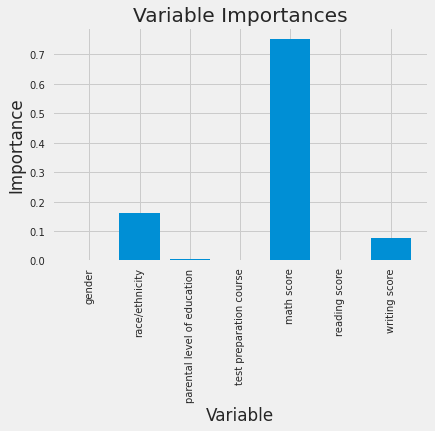

In [47]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); plt.title('Variable Importances');

# K means Clustering

In [48]:
#import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [49]:
data=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [50]:
data['average_score']=(data['math score']+data['reading score']
                       +data['writing score'])//3

In [51]:
# Taking the score and average score for the model
x=data.iloc[:,5:9]

In [52]:
kmeans=KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [53]:
#table shows the  numeric data to display
x

,math score,reading score,writing score,average_score
0,72,72,74,72
1,69,90,88,82
2,90,95,93,92
3,47,57,44,49
4,76,78,75,76
...,...,...,...,...
995,88,99,95,94
996,62,55,55,57
997,59,71,65,65
998,68,78,77,74


In [54]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=92513b61b3abeaead9ccbbc3abbcf8a60f71eec91b3faba2674dea9641a1b35b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


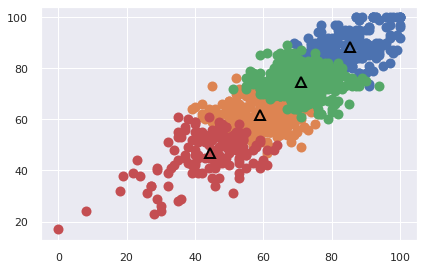

In [55]:
#Based on the above table plot on the axis displaying subject scores and average score
import mglearn
X=data.iloc[:,5:7].values
y=data.iloc[:,8].values
mglearn.discrete_scatter(X[:, 0], X[:, 1],
                kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], [0, 1, 2,3],
markers='^', markeredgewidth=2)

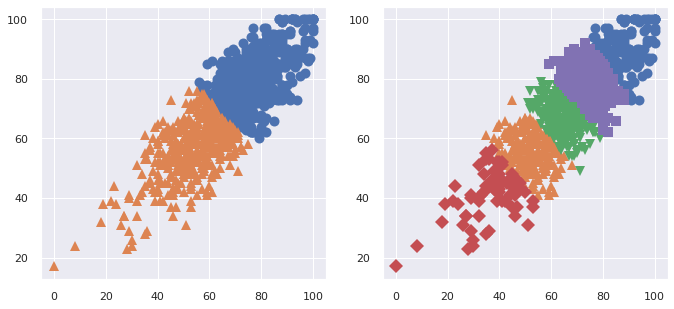

In [56]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

In [57]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[ 0.39002351,  0.19399858,  0.39149181,  0.31951031],
       [ 0.19207553,  1.42747598,  1.31326868,  1.02095996],
       [ 1.57771141,  1.77010859,  1.64247471,  1.72240961],
       ...,
       [-0.46775108,  0.12547206, -0.20107904, -0.17150444],
       [ 0.12609287,  0.60515772,  0.58901542,  0.45980024],
       [ 0.71993682,  1.15336989,  1.18158627,  1.09110493]])

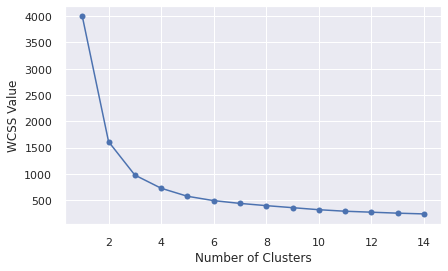

In [58]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")
plt.show()

# Dendogram

In [59]:
X=data.iloc[:,5:7].values
y=data.iloc[:,8].values

Text(0, 0.5, 'Distance')

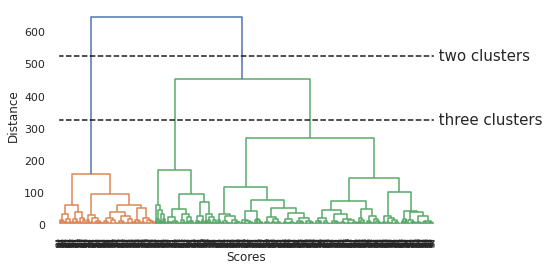

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z=linkage(X,'ward')
dendrogram(Z)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [525, 525], '--', c='k')
ax.plot(bounds, [325, 325], '--', c='k')
ax.text(bounds[1], 525, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 325, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Scores")
plt.ylabel("Distance")

In [61]:
identified_cluster=kmeans.fit_predict(x)

In [62]:
student_cluster=x.copy()
student_cluster['clusters_pred']=identified_cluster
student_cluster

,math score,reading score,writing score,average_score,clusters_pred
0,72,72,74,72,6
1,69,90,88,82,9
2,90,95,93,92,2
3,47,57,44,49,0
4,76,78,75,76,1
...,...,...,...,...,...
995,88,99,95,94,2
996,62,55,55,57,13
997,59,71,65,65,3
998,68,78,77,74,12


Text(0.5, 0, 'score')

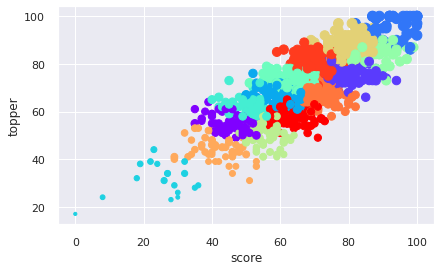

In [63]:
plt.scatter(student_cluster['math score'],student_cluster['reading score'],
            student_cluster['writing score'],
            c=student_cluster['clusters_pred'],cmap='rainbow')
plt.ylabel('topper')
plt.xlabel('score')

Text(0.5, 0, 'score')

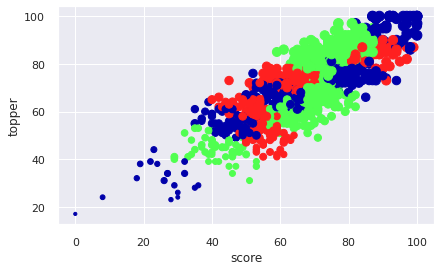

In [64]:
plt.scatter(student_cluster['math score'],student_cluster['reading score'],
    student_cluster['writing score'],c=identified_cluster, cmap=mglearn.cm3)
plt.ylabel('topper')
plt.xlabel('score')

# Agglomerative Cluster

Text(0, 0.5, 'Topper')

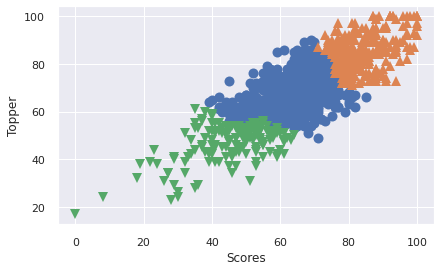

In [65]:
from sklearn.cluster import AgglomerativeClustering
X=data.iloc[:,5:7].values
y=data.iloc[:,8].values
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Scores")
plt.ylabel("Topper")

# DBSCAN

Text(0, 0.5, 'Feature 1')

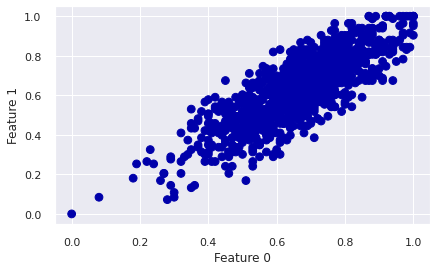

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#  Exploring cluster and select number of cluster

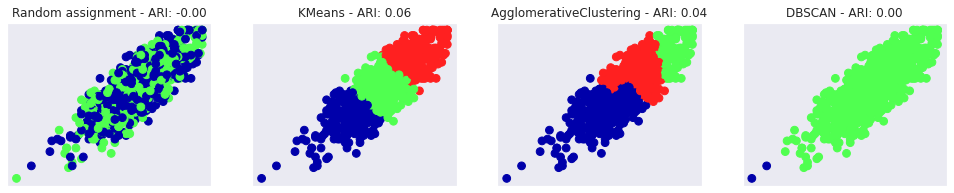

In [67]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
X=data.iloc[:,5:7].values
y=data.iloc[:,8].values
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3),
              AgglomerativeClustering(n_clusters=3),DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
    cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
    adjusted_rand_score(y, clusters)))

In [68]:
X

array([[72, 72],
       [69, 90],
       [90, 95],
       ...,
       [59, 71],
       [68, 78],
       [77, 86]])

# Cluster

In [69]:
kmeans_new=KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters_pred']=kmeans_new.fit_predict(x_scaled)

Text(0.5, 0, 'score')

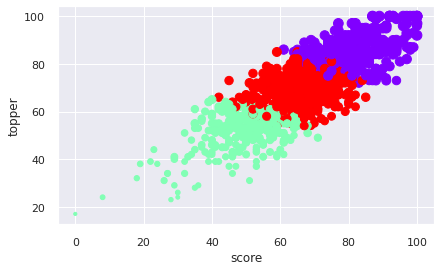

In [70]:
plt.scatter(clusters_new['math score'],clusters_new['reading score'],
            clusters_new['writing score'],
            c=clusters_new['clusters_pred'],cmap='rainbow')
plt.ylabel('topper')
plt.xlabel('score')

# Dimensionality Reduction

In [71]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
from sklearn.decomposition import PCA

In [72]:
data=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv') #Read the data 

In [73]:
data['average_score']=(data['math score']+data['reading score']
                       +data['writing score'])//3
data.average_score.value_counts()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [74]:
#Converting string to numeric data
#gender
data=data.replace({'male':1,'female':0})
#race/ethinic group
data= data.replace({'group A':0, 'group B':1,
                'group C':2, 'group D':3, 'group E':4})
#lunch
data= data.replace({'free/reduced':0, 'standard':1})
#test preparation course
data= data.replace({'none':0, 'completed':1})
#parents education
data= data.replace({'some college':3, "associate's degree":2, 'high school':4,
                    'some high school':5, "bachelor's degree":1, "master's degree":0})

In [75]:
y=data['average_score'] #dependent variables
X=data[data.columns.difference(['average_score'])] #dependent variables
X.head()

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,0,1,72,1,1,72,0,74
1,0,1,69,3,2,90,1,88
2,0,1,90,0,1,95,0,93
3,1,0,47,2,0,57,0,44
4,1,1,76,3,2,78,0,75


In [76]:
labels=['Fail','Pass']
bins=[0,75,100] #range 0>75 , 75>100
y=pd.cut(y,bins,labels=labels)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# plot the cluster assignments
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (1000, 8)
Reduced shape: (1000, 2)


In [78]:
X_scaled

array([[-0.96462528,  0.74188112,  0.39002351, ...,  0.19399858,
        -0.74674788,  0.39149181],
       [-0.96462528,  0.74188112,  0.19207553, ...,  1.42747598,
         1.33914006,  1.31326868],
       [-0.96462528,  0.74188112,  1.57771141, ...,  1.77010859,
        -0.74674788,  1.64247471],
       ...,
       [-0.96462528, -1.34792485, -0.46775108, ...,  0.12547206,
         1.33914006, -0.20107904],
       [-0.96462528,  0.74188112,  0.12609287, ...,  0.60515772,
         1.33914006,  0.58901542],
       [-0.96462528, -1.34792485,  0.71993682, ...,  1.15336989,
        -0.74674788,  1.18158627]])

In [79]:
y=data['average_score'] #independent variables
X=data[data.columns.difference(['average_score'])] #dependent variables


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                            y,test_size=0.2,shuffle=True,random_state=1)

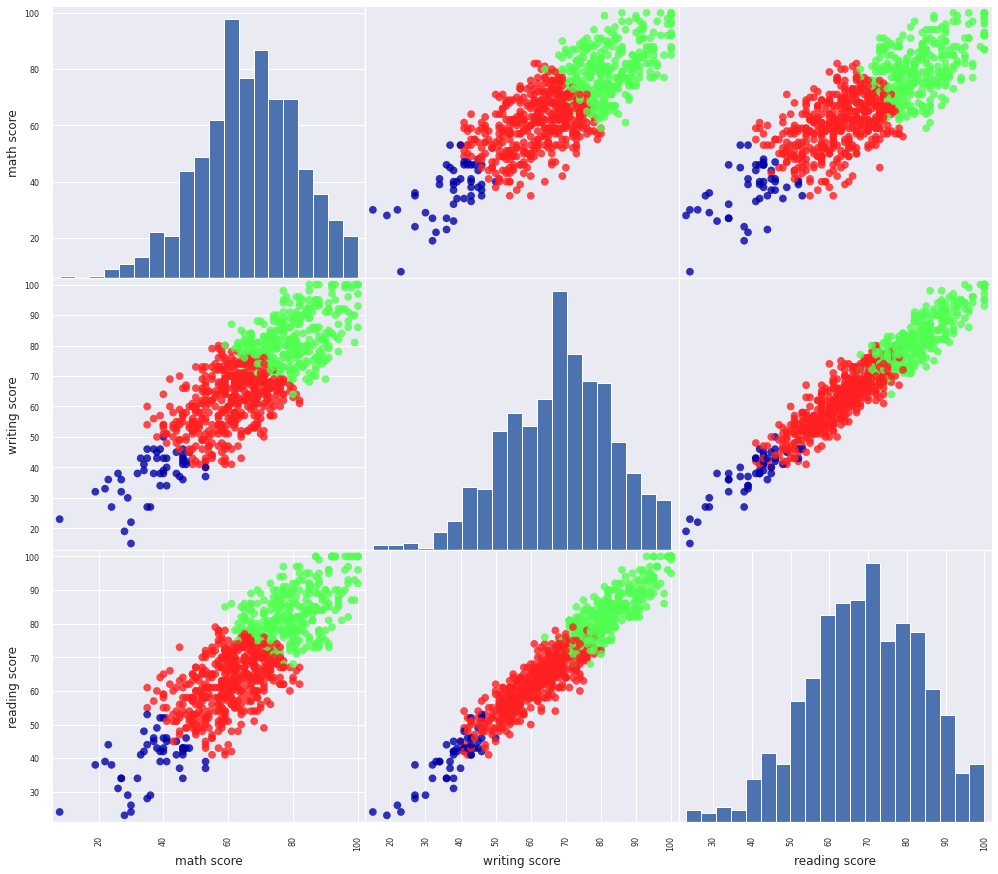

In [81]:
from pandas.plotting import scatter_matrix# to input color
student_dataframe = pd.DataFrame(X_train, 
                    columns=['math score','writing score','reading score'])
grr = scatter_matrix(student_dataframe,c=y_train,figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [82]:
c1=data["gender"]

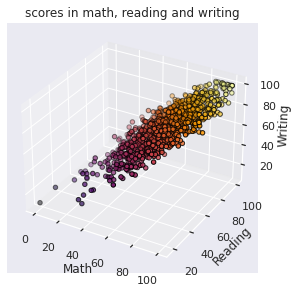

In [83]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv').loc[:,
            ['math score','reading score','writing score']]
df.columns = ['Math', 'Reading', 'Writing']

# plot the original data:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = df['Math']
ys = df['Reading']
zs = df['Writing']
color_control = (df['Math'] + df['Reading'] + df['Writing']) / 300
ax.scatter(xs, ys, zs, marker='o', c=color_control, cmap='inferno', edgecolors='black')
ax.set_xlabel('Math')
ax.set_ylabel('Reading')
ax.set_zlabel('Writing')
ax.set_title('scores in math, reading and writing')
plt.tight_layout()
plt.savefig('3d')
plt.show()

In [84]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 8)


In [85]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.10541015 -0.21294448 -0.5065405   0.16022767 -0.15083566 -0.54428707
  -0.19123895 -0.55291501]
 [-0.78224493 -0.4315931  -0.31546866 -0.19907728 -0.14255833  0.10510836
   0.08833952  0.15327596]]


Text(0, 0.5, 'Principal components')

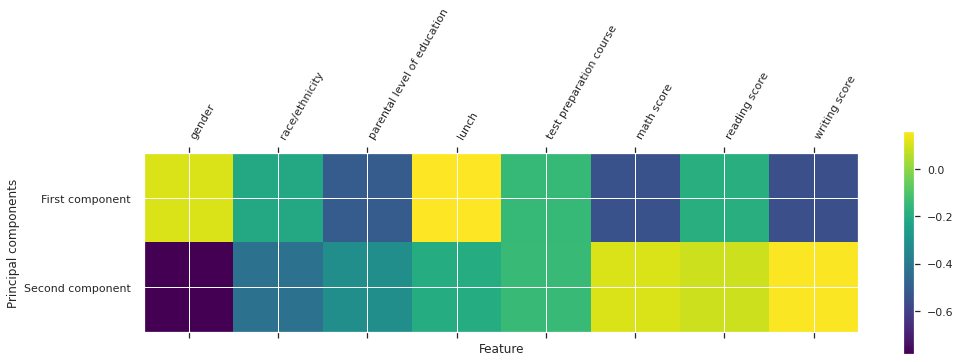

In [86]:
data=data.drop(['average_score'], axis=1)
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(data.columns)),
data.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")